In [1]:
import nltk
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import string
import re


In [2]:
df = pd.read_csv('testdata.manual.2009.06.14.csv', header=None,parse_dates=[2])
print(df.head)

<bound method NDFrame.head of      0      1                   2             3                4  \
0    4      3 2009-05-11 03:17:40       kindle2           tpryan   
1    4      4 2009-05-11 03:18:03       kindle2           vcu451   
2    4      5 2009-05-11 03:18:54       kindle2           chadfu   
3    4      6 2009-05-11 03:19:04       kindle2            SIX15   
4    4      7 2009-05-11 03:21:41       kindle2         yamarama   
5    4      8 2009-05-11 03:22:00       kindle2     GeorgeVHulme   
6    0      9 2009-05-11 03:22:30           aig          Seth937   
7    4     10 2009-05-11 03:26:10        jquery        dcostalis   
8    4     11 2009-05-11 03:27:15       twitter          PJ_King   
9    4     12 2009-05-11 03:29:20         obama      mandanicole   
10   2     13 2009-05-11 03:32:42         obama             jpeb   
11   0     14 2009-05-11 03:32:48         obama      kylesellers   
12   4     15 2009-05-11 03:33:38         obama      theviewfans   
13   4     16 2009

In [3]:
df_cols=['polarity', 'id','date','query','user','text']
df.columns = df_cols
df.columns

Index(['polarity', 'id', 'date', 'query', 'user', 'text'], dtype='object')

In [4]:
df.drop(['polarity', 'id','date','query','user'], axis=1, inplace=True)

In [5]:
#remove ‘@’
for i in df.index:
     for i in df.index:
            sub = re.sub(r'@[A-Za-z0-9_]+','',df.text[i])
            df["text"][i]=sub

In [6]:
# remove '#' and links
for i in df.index:
    sub = re.sub("[^a-zA-Z]", " ", df.text[i])
    df["text"][i]=sub  
for i in df.index:
    sub = re.sub('https?://[A-Za-z0-9./]+','',df.text[i])
    df["text"][i]=sub



In [7]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer#specially tokenize twitter tweets
tt=TweetTokenizer()
df['text']=df['text'].apply(tt.tokenize)

In [8]:
df['text-filtered'] = ""

In [9]:
#remove punctuations
for w in df.index:
    rem=[i for i in df['text-filtered'][w] if i not in punctuations]
    df['text-filtered'][w]=rem

In [10]:
#remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in df.index:
    filtered_sentence= [w for w in df['text'][i] if not w in stop_words] 
    df['text-filtered'][i] = filtered_sentence

In [17]:
#steamming of data
from nltk.stem import PorterStemmer, WordNetLemmatizer
porter_stemmer = PorterStemmer()
df['text-stem']=df['text-filtered'].apply(lambda x : [porter_stemmer.stem(y) for y in x])

In [18]:
#dividing into n-grams (4)
four=[]
for j in range(498):
    fourgrams=nltk.collocations.QuadgramCollocationFinder.from_words(df['text-stem'] [j])
    df['four']=""
    for fourgram,value in fourgrams.ngram_fd.items():
        four.append(list(fourgram))
        print(list(fourgram))

['I', 'loooooooovvvvvvee', 'kindl', 'not']
['loooooooovvvvvvee', 'kindl', 'not', 'DX']
['kindl', 'not', 'DX', 'cool']
['not', 'DX', 'cool', 'fantast']
['DX', 'cool', 'fantast', 'right']
['read', 'kindl', 'love', 'lee']
['kindl', 'love', 'lee', 'child']
['love', 'lee', 'child', 'good']
['lee', 'child', 'good', 'read']
['Ok', 'first', 'asses', 'kindl']
['first', 'asses', 'kindl', 'fuck']
['asses', 'kindl', 'fuck', 'rock']
['you', 'love', 'kindl', 'I']
['love', 'kindl', 'I', 'mine']
['kindl', 'I', 'mine', 'month']
['I', 'mine', 'month', 'never']
['mine', 'month', 'never', 'look']
['month', 'never', 'look', 'back']
['never', 'look', 'back', 'the']
['look', 'back', 'the', 'new']
['back', 'the', 'new', 'big']
['the', 'new', 'big', 'one']
['new', 'big', 'one', 'huge']
['big', 'one', 'huge', 'No']
['one', 'huge', 'No', 'need']
['huge', 'No', 'need', 'remors']
['fair', 'enough', 'but', 'kindl']
['enough', 'but', 'kindl', 'I']
['but', 'kindl', 'I', 'think']
['kindl', 'I', 'think', 'perfect']
['b

['soni', 'coupon', 'code', 'expir']
['coupon', 'code', 'expir', 'soon']
['code', 'expir', 'soon', 'http']
['expir', 'soon', 'http', 'www']
['soon', 'http', 'www', 'coupondork']
['http', 'www', 'coupondork', 'com']
['www', 'coupondork', 'com', 'r']
['luke', 'got', 'stop', 'walk']
['got', 'stop', 'walk', 'safeway']
['stop', 'walk', 'safeway', 'ask']
['walk', 'safeway', 'ask', 'empti']
['safeway', 'ask', 'empti', 'pocket']
['ask', 'empti', 'pocket', 'lift']
['empti', 'pocket', 'lift', 'shirt']
['pocket', 'lift', 'shirt', 'jack']
['did', 'realiz', 'gym', 'safeway']
['I', 'three', 'word', 'safeway']
['three', 'word', 'safeway', 'dot']
['word', 'safeway', 'dot', 'com']
['safeway', 'rock', 'n', 'roll']
['rock', 'n', 'roll', 'tonight']
['bout', 'hit', 'safeway', 'I']
['hit', 'safeway', 'I', 'gotta']
['safeway', 'I', 'gotta', 'eat']
['found', 'safeway', 'pick', 'stapl']
['safeway', 'super', 'market', 'via']
['super', 'market', 'via', 'mobil']
['market', 'via', 'mobil', 'coupon']
['via', 'mobil'

['new', 'toy', 'canon', 'D']
['toy', 'canon', 'D', 'love']
['canon', 'D', 'love', 'love']
['D', 'love', 'love', 'love']
['job', 'sitterc', 'help', 'take']
['sitterc', 'help', 'take', 'care']
['help', 'take', 'care', 'sick']
['take', 'care', 'sick', 'child']
['care', 'sick', 'child', 'east']
['sick', 'child', 'east', 'palo']
['child', 'east', 'palo', 'alto']
['east', 'palo', 'alto', 'CA']
['palo', 'alto', 'CA', 'http']
['alto', 'CA', 'http', 'tinyurl']
['CA', 'http', 'tinyurl', 'com']
['http', 'tinyurl', 'com', 'qwrr']
['I', 'move', 'east', 'palo']
['move', 'east', 'palo', 'alto']
['atebit', 'I', 'finish', 'watch']
['I', 'finish', 'watch', 'stanford']
['finish', 'watch', 'stanford', 'iphon']
['watch', 'stanford', 'iphon', 'class']
['stanford', 'iphon', 'class', 'session']
['iphon', 'class', 'session', 'I']
['class', 'session', 'I', 'realli']
['session', 'I', 'realli', 'appreci']
['I', 'realli', 'appreci', 'you']
['realli', 'appreci', 'you', 'rock']
['Hi', 'just', 'saw', 'stanford']
['ju

['may', 'column', 'one', 'smart']
['column', 'one', 'smart', 'guy']
['one', 'smart', 'guy', 'look']
['smart', 'guy', 'look', 'close']
['guy', 'look', 'close', 'impress']
['look', 'close', 'impress', 'kindl']
['close', 'impress', 'kindl', 'http']
['impress', 'kindl', 'http', 'bit']
['kindl', 'http', 'bit', 'ly']
['http', 'bit', 'ly', 'pey']
['thank', 'much', 'one', 'happi']
['much', 'one', 'happi', 'kindl']
['one', 'happi', 'kindl', 'winner']
['happi', 'kindl', 'winner', 'I']
['kindl', 'winner', 'I', 'surpris']
['winner', 'I', 'surpris', 'fabul']
['I', 'surpris', 'fabul', 'thank']
['surpris', 'fabul', 'thank', 'best']
['fabul', 'thank', 'best', 'kathleen']
['man', 'I', 'kinda', 'dislik']
['I', 'kinda', 'dislik', 'appl']
['kinda', 'dislik', 'appl', 'right']
['dislik', 'appl', 'right', 'case']
['appl', 'right', 'case', 'point']
['right', 'case', 'point', 'iphon']
['case', 'point', 'iphon', 'GS']
['point', 'iphon', 'GS', 'wish']
['iphon', 'GS', 'wish', 'video']
['GS', 'wish', 'video', 'rec

In [31]:
df1=pd.DataFrame(four) 
df1.columns=['0','1','2','3']

In [32]:
df1['New']=df1['0']+" "+df1['1']+" "+df1['2']

In [33]:
df1

,0,1,2,3,New
0,I,loooooooovvvvvvee,kindl,not,I loooooooovvvvvvee kindl
1,loooooooovvvvvvee,kindl,not,DX,loooooooovvvvvvee kindl not
2,kindl,not,DX,cool,kindl not DX
3,not,DX,cool,fantast,not DX cool
4,DX,cool,fantast,right,DX cool fantast
5,read,kindl,love,lee,read kindl love
6,kindl,love,lee,child,kindl love lee
7,love,lee,child,good,love lee child
8,lee,child,good,read,lee child good
9,Ok,first,asses,kindl,Ok first asses


In [34]:
#This x will be vectorized using tf-idf
X_word_vector = df1.iloc[:,4].values
y = df1.iloc[:, 3].values

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cross_validation import train_test_split

/Users/divyansha/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
TfidfVect = TfidfVectorizer()
X_word_vector = TfidfVect.fit_transform(X_word_vector)

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labels = labelencoder_y.fit_transform(y)

In [40]:
x_train_word_vector, x_test_word_vector, y_train, y_test = train_test_split(X_word_vector, labels, test_size=0.2, random_state=0)

In [41]:
from sklearn.metrics import confusion_matrix 
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 4,criterion='gini').fit(x_train_word_vector, y_train)
dtree_predictions = dtree_model.predict(x_test_word_vector)
 
# creating a confusion matrix
cm_dtree_model = confusion_matrix(y_test, dtree_predictions)

In [42]:
accuracy_dtree_model = dtree_model.score(x_test_word_vector, y_test)
print(accuracy_dtree_model)

0.0806916426513


In [43]:
label=[]
accuracy=[]
label.append('dtree_model')
accuracy.append(accuracy_dtree_model)

In [44]:
 # training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train_word_vector, y_train)
svm_predictions = svm_model_linear.predict(x_test_word_vector)
 
# model accuracy for X_test  
accuracy_svm = svm_model_linear.score(x_test_word_vector, y_test)
 
# creating a confusion matrix
cm_svm = confusion_matrix(y_test, svm_predictions)

In [45]:
print(accuracy_svm )
label.append('svm_model_linear')
accuracy.append(accuracy_svm)

0.102305475504


In [46]:
#pickling of our model 
import pickle
save_classifier = open("svm_model_linear.pickle","wb")
pickle.dump(svm_model_linear, save_classifier)
save_classifier.close()

In [47]:
from sklearn import metrics
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1, 100))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_word_vector, y_train)
    y_pred = knn.predict(x_test_word_vector)
    scores.append(metrics.accuracy_score(y_test, y_pred))
 
# creating a confusion matrix
knn_predictions = knn.predict(x_test_word_vector) 
cm_knn = confusion_matrix(y_test, knn_predictions)

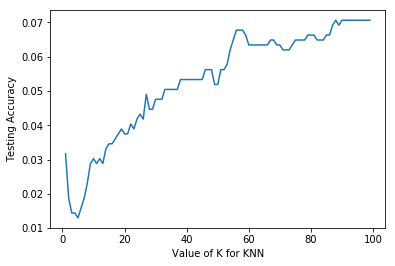

In [48]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.savefig("knn_accuracy.png")

In [49]:
knn = KNeighborsClassifier(n_neighbors = 95).fit(x_train_word_vector, y_train)
 
# accuracy on X_test
accuracy_knn = knn.score(x_test_word_vector, y_test)
print (accuracy_knn)

0.0706051873199


In [50]:
label.append('knn')
accuracy.append(accuracy_knn)

In [51]:
#pickling of our model 
import pickle
save_classifier = open("knn.pickle","wb")
pickle.dump(knn, save_classifier)
save_classifier.close()

In [52]:
x_train_word_vector=x_train_word_vector.toarray()
x_test_word_vector=x_test_word_vector.toarray()
# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(x_train_word_vector, y_train)
gnb_predictions = gnb.predict(x_test_word_vector)
 
# accuracy on X_test
accuracy_gnb = gnb.score(x_test_word_vector, y_test)
print (accuracy_gnb)
 
# creating a confusion matrix
cm_gnb = confusion_matrix(y_test, gnb_predictions)

0.0317002881844


In [53]:
#pickling of our model 
import pickle
save_classifier = open("gnb.pickle","wb")
pickle.dump(gnb, save_classifier)
save_classifier.close()

In [54]:
label.append('gnb')
accuracy.append(accuracy_gnb)

In [55]:
from sklearn import svm
svc = svm.SVC(decision_function_shape='ovo')
svc.fit(x_train_word_vector, y_train) 
accuracy_svc = svc.score(x_test_word_vector, y_test)
print (accuracy_svc)

0.0389048991354


In [56]:
#pickling of our model 
import pickle
save_classifier = open("svc.pickle","wb")
pickle.dump(svc, save_classifier)
save_classifier.close()

In [57]:
label.append('svc')
accuracy.append(accuracy_svc)

In [58]:
lin_svc = svm.LinearSVC()
lin_svc.fit(x_train_word_vector, y_train) 
accuracy_lin_svc = lin_svc.score(x_test_word_vector, y_test)
print (accuracy_lin_svc)

0.0806916426513


In [59]:
#pickling of our model 
import pickle
save_classifier = open("lin_svc.pickle","wb")
pickle.dump(lin_svc, save_classifier)
save_classifier.close()

In [60]:
label.append('lin_svc')
accuracy.append(accuracy_lin_svc)

In [61]:
lin_clf_cr = svm.LinearSVC(multi_class='crammer_singer')
lin_clf_cr.fit(x_train_word_vector, y_train) 
accuracy_lin_clf_cr = lin_clf_cr.score(x_test_word_vector, y_test)
print (accuracy_lin_clf_cr)

0.0792507204611


In [62]:
#pickling of our model 
import pickle
save_classifier = open("lin_clf_cr.pickle","wb")
pickle.dump(lin_clf_cr, save_classifier)
save_classifier.close()

In [63]:
label.append('lin_clf_cr')
accuracy.append(accuracy_lin_clf_cr)

In [64]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(x_train_word_vector, y_train) 
accuracy_rbf_svc = rbf_svc.score(x_test_word_vector, y_test)
print (accuracy_rbf_svc)

0.0389048991354


In [65]:
#pickling of our model 
import pickle
save_classifier = open("rbf_svc.pickle","wb")
pickle.dump(rbf_svc, save_classifier)
save_classifier.close()

In [66]:
label.append('rbf_svc')
accuracy.append(accuracy_rbf_svc)

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train_word_vector, y_train)
print(rf.feature_importances_)
accuracy_rf = rf.score(x_test_word_vector, y_test)
print (accuracy_rf)

[ 0.  0.  0. ...,  0.  0.  0.]
0.0576368876081


In [68]:
label.append('rf')
accuracy.append(accuracy_rf)

In [69]:
#pickling of our model 
import pickle
save_classifier = open("rf.pickle","wb")
pickle.dump(rf, save_classifier)
save_classifier.close()

In [70]:
X = df1.iloc[:,:3].values
y = df1.iloc[:, 3].values

In [71]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
labels = labelencoder_y.fit_transform(y)
X=pd.DataFrame(X)
X=X.apply(LabelEncoder().fit_transform)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=0)

In [73]:
from sklearn.metrics import confusion_matrix 
# training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier 
dtree_model2 = DecisionTreeClassifier(max_depth = 2).fit(x_train, y_train)
dtree_predictions2 = dtree_model2.predict(x_test)
 
# creating a confusion matrix
cm_dtree_model2 = confusion_matrix(y_test, dtree_predictions)

In [74]:
accuracy_dtree_model2 = dtree_model2.score(x_test, y_test)
print(accuracy_dtree_model2)

0.0547550432277


In [75]:
label.append('dtree_model2')
accuracy.append(accuracy_dtree_model2)

In [76]:
rf2 = RandomForestClassifier(max_depth=20, random_state=0)
rf2.fit(x_train, y_train)
print(rf2.feature_importances_)
accuracy_rf2 = rf2.score(x_test, y_test)
print (accuracy_rf2)

[ 0.33053664  0.3270307   0.34243267]
0.0720461095101


In [77]:
#pickling of our model 
import pickle
save_classifier = open("rf2.pickle","wb")
pickle.dump(rf2, save_classifier)
save_classifier.close()

In [78]:
label.append('rf2')
accuracy.append(accuracy_rf2)

In [79]:
from sklearn import metrics
# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
k_range = list(range(1,100))
scores2 = []


for k in k_range:
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(x_train, y_train)
    y_pred = knn2.predict(x_test)
    scores2.append(metrics.accuracy_score(y_test, y_pred))
 
# creating a confusion matrix
knn_predictions2 = knn2.predict(x_test) 
cm_knn2 = confusion_matrix(y_test, knn_predictions2)

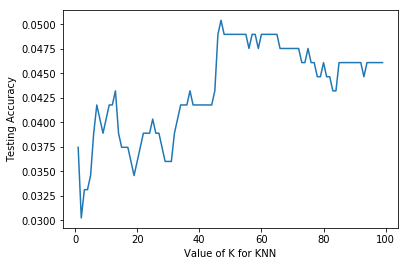

In [80]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
plt.plot(k_range, scores2)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.savefig("knn2_accuracy.png")

In [83]:
knn2 = KNeighborsClassifier(n_neighbors = 55).fit(x_train, y_train)
 
# accuracy on X_test
accuracy_knn2 = knn2.score(x_test, y_test)
print (accuracy_knn2)

0.0489913544669


In [84]:
label.append('knn2')
accuracy.append(accuracy_knn2)

In [85]:
#pickling of our model 
import pickle
save_classifier = open("knn2.pickle","wb")
pickle.dump(knn2, save_classifier)
save_classifier.close()

In [86]:
import matplotlib.pyplot as plt
import numpy as np
index = np.arange(len(label))
def plot_bar_x():
    # this is for plotting purpose
    index = np.arange(len(label))
    plt.bar(index, accuracy)
    plt.xlabel('Model', fontsize=10)
    plt.ylabel('Accuracy', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=90)
    plt.title('Accuracy of different models')
    plt.savefig("model_accuracy.png")
    plt.show()

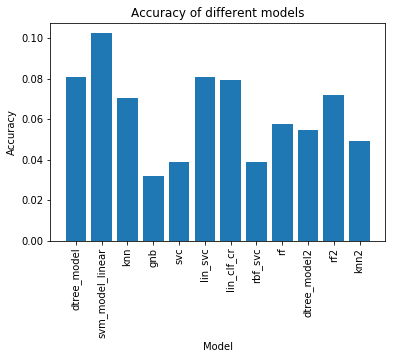

In [87]:
plot_bar_x()